# Importing libraries

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importing json file for which the data have been crawled

In [3]:
import pandas as pd
df = pd.read_json ('opioid.json', lines = True )
print (df)

                  created_at                   id               id_str  \
0  2020-03-14 17:21:13+00:00  1238877857830461442  1238877857830461440   
1  2020-03-14 17:21:20+00:00  1238877887836512256  1238877887836512256   
2  2020-03-14 17:21:25+00:00  1238877908963213312  1238877908963213312   
3  2020-03-14 17:22:00+00:00  1238878056892301319  1238878056892301312   
4  2020-03-14 17:22:16+00:00  1238878122038173697  1238878122038173696   
5  2020-03-14 17:24:20+00:00  1238878641880289286  1238878641880289280   
6  2020-03-14 17:25:31+00:00  1238878942997745666  1238878942997745664   
7  2020-03-14 17:26:01+00:00  1238879067769917440  1238879067769917440   
8  2020-03-14 17:26:06+00:00  1238879088753799169  1238879088753799168   
9  2020-03-14 17:27:04+00:00  1238879330488500225  1238879330488500224   
10 2020-03-14 17:27:23+00:00  1238879409760808960  1238879409760808960   
11 2020-03-14 17:27:43+00:00  1238879492849967104  1238879492849967104   
12 2020-03-14 17:27:58+00:00  12388795

In [4]:
# Data frame view

In [5]:
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities
0,2020-03-14 17:21:13+00:00,1238877857830461442,1238877857830461440,RT @tammytabby: Moment Oklahoma officer collap...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,en,2020-03-14 17:21:13.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-14 17:21:20+00:00,1238877887836512256,1238877887836512256,RT @victorykn: @NOIResearch The Jewish Family ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,en,2020-03-14 17:21:20.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-14 17:21:25+00:00,1238877908963213312,1238877908963213312,@robertgriffin5 @CaGueva15 @LizLiz_Di @marklev...,"<a href=""http://twitter.com/download/android"" ...",True,1.238674e+18,1.238674e+18,317968711.0,317968711.0,...,en,2020-03-14 17:21:25.392,"[53, 140]",{'full_text': '@robertgriffin5 @CaGueva15 @Liz...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-14 17:22:00+00:00,1238878056892301319,1238878056892301312,#OpioidCrisis #SuicidePrevention #BehavioralHe...,"<a href=""http://meetedgar.com"" rel=""nofollow"">...",True,NaN,NaN,NaN,NaN,...,en,2020-03-14 17:22:00.661,NaN,{'full_text': '#OpioidCrisis #SuicidePreventio...,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-14 17:22:16+00:00,1238878122038173697,1238878122038173696,#ChoreographYourJobChanges https://t.co/GWwSuj...,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,NaN,NaN,NaN,NaN,...,und,2020-03-14 17:22:16.193,NaN,NaN,0.0,1.238868e+18,1.238868e+18,{'created_at': 'Sat Mar 14 16:40:05 +0000 2020...,"{'url': 'https://t.co/GWwSuj6aLF', 'expanded':...",NaN


In [6]:
 df.rename(columns = {'text':'Tweets'}, inplace = True)
df.head()

,created_at,id,id_str,Tweets,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities
0,2020-03-14 17:21:13+00:00,1238877857830461442,1238877857830461440,RT @tammytabby: Moment Oklahoma officer collap...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,en,2020-03-14 17:21:13.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-14 17:21:20+00:00,1238877887836512256,1238877887836512256,RT @victorykn: @NOIResearch The Jewish Family ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,en,2020-03-14 17:21:20.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-14 17:21:25+00:00,1238877908963213312,1238877908963213312,@robertgriffin5 @CaGueva15 @LizLiz_Di @marklev...,"<a href=""http://twitter.com/download/android"" ...",True,1.238674e+18,1.238674e+18,317968711.0,317968711.0,...,en,2020-03-14 17:21:25.392,"[53, 140]",{'full_text': '@robertgriffin5 @CaGueva15 @Liz...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-14 17:22:00+00:00,1238878056892301319,1238878056892301312,#OpioidCrisis #SuicidePrevention #BehavioralHe...,"<a href=""http://meetedgar.com"" rel=""nofollow"">...",True,NaN,NaN,NaN,NaN,...,en,2020-03-14 17:22:00.661,NaN,{'full_text': '#OpioidCrisis #SuicidePreventio...,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-14 17:22:16+00:00,1238878122038173697,1238878122038173696,#ChoreographYourJobChanges https://t.co/GWwSuj...,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,NaN,NaN,NaN,NaN,...,und,2020-03-14 17:22:16.193,NaN,NaN,0.0,1.238868e+18,1.238868e+18,{'created_at': 'Sat Mar 14 16:40:05 +0000 2020...,"{'url': 'https://t.co/GWwSuj6aLF', 'expanded':...",NaN


# Dropping out the rest of the columns

In [7]:
df.drop(df.iloc[:, 4:37], inplace = True, axis = 1) 
  
df.head()


,created_at,id,id_str,Tweets
0,2020-03-14 17:21:13+00:00,1238877857830461442,1238877857830461440,RT @tammytabby: Moment Oklahoma officer collap...
1,2020-03-14 17:21:20+00:00,1238877887836512256,1238877887836512256,RT @victorykn: @NOIResearch The Jewish Family ...
2,2020-03-14 17:21:25+00:00,1238877908963213312,1238877908963213312,@robertgriffin5 @CaGueva15 @LizLiz_Di @marklev...
3,2020-03-14 17:22:00+00:00,1238878056892301319,1238878056892301312,#OpioidCrisis #SuicidePrevention #BehavioralHe...
4,2020-03-14 17:22:16+00:00,1238878122038173697,1238878122038173696,#ChoreographYourJobChanges https://t.co/GWwSuj...


In [8]:
df.drop(df.iloc[:, 0:3], inplace = True, axis = 1) 
  
df.head()


,Tweets
0,RT @tammytabby: Moment Oklahoma officer collap...
1,RT @victorykn: @NOIResearch The Jewish Family ...
2,@robertgriffin5 @CaGueva15 @LizLiz_Di @marklev...
3,#OpioidCrisis #SuicidePrevention #BehavioralHe...
4,#ChoreographYourJobChanges https://t.co/GWwSuj...


In [9]:
# cleaning of a data frame 

In [10]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' 
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# After preprocessing tweets
df.head()

,Tweets
0,: Moment Oklahoma officer collapses immediatel...
1,: The Jewish Family Making Billions From The ...
2,"5 15 _Di Look at it this, a least he didn't h..."
3,OpioidCrisis SuicidePrevention BehavioralHealt...
4,ChoreographYourJobChanges


In [11]:
# Using Text Blob for Sentiment Analysis

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df.head()

,Tweets,Subjectivity,Polarity
0,: Moment Oklahoma officer collapses immediatel...,0.450000,0.150000
1,: The Jewish Family Making Billions From The ...,0.227273,0.068182
2,"5 15 _Di Look at it this, a least he didn't h...",0.400000,-0.300000
3,OpioidCrisis SuicidePrevention BehavioralHealt...,0.000000,0.000000
4,ChoreographYourJobChanges,0.000000,0.000000


In [13]:
# Using Word cloud Visualization

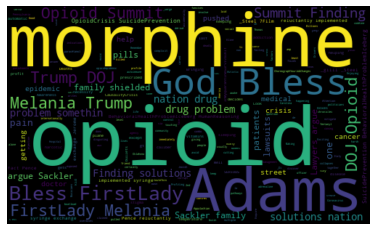

In [14]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,: Moment Oklahoma officer collapses immediatel...,0.450000,0.150000,Positive
1,: The Jewish Family Making Billions From The ...,0.227273,0.068182,Positive
2,"5 15 _Di Look at it this, a least he didn't h...",0.400000,-0.300000,Negative
3,OpioidCrisis SuicidePrevention BehavioralHealt...,0.000000,0.000000,Neutral
4,ChoreographYourJobChanges,0.000000,0.000000,Neutral


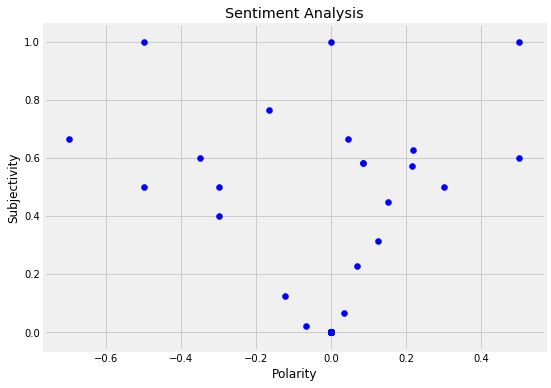

In [17]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [18]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

21.1

In [19]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.8

In [20]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     36
Positive    12
Negative     9
Name: Analysis, dtype: int64

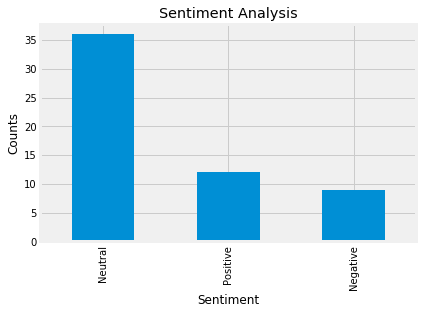

In [21]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Refrences

*https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf?gi=5da5acc22127


*https://medium.com/seek-blog/your-guide-to-sentiment-analysis-344d43d225a7


*https://medium.com/@randerson112358/twitter-sentiment-analysis-15d8892c0082


*https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python


